In [1]:
# pip install yfinance
# pip install pandas
# pip install numpy
# pip install matplotlib
# pip install scikit-learn
# pip install keras


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
from datetime import datetime, timedelta


In [3]:
# 1. Load Avalanche data from yfinance
end_date = datetime.now().strftime("%Y-%m-%d")
data = yf.download('AVAX-USD', start='2015-01-01', end=end_date)

# Display the first few rows of the data
print(data.head())


[*********************100%***********************]  1 of 1 completed

Price                     Adj Close     Close       High       Low      Open  \
Ticker                     AVAX-USD  AVAX-USD   AVAX-USD  AVAX-USD  AVAX-USD   
Date                                                                           
2020-07-13 00:00:00+00:00  4.896294  4.896294   4.915115  4.481499  4.613968   
2020-07-14 00:00:00+00:00  4.986754  4.986754   5.229564  4.762068  4.909865   
2020-09-22 00:00:00+00:00  5.234632  5.234632  11.463443  4.125380  4.986754   
2020-09-23 00:00:00+00:00  4.118469  4.118469   5.329310  3.982604  5.321654   
2020-09-24 00:00:00+00:00  4.566561  4.566561   4.751878  3.539887  3.817925   

Price                         Volume  
Ticker                      AVAX-USD  
Date                                  
2020-07-13 00:00:00+00:00      28340  
2020-07-14 00:00:00+00:00       3957  
2020-09-22 00:00:00+00:00  288098840  
2020-09-23 00:00:00+00:00  173091214  
2020-09-24 00:00:00+00:00   96110964  


In [4]:
data.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AVAX-USD,AVAX-USD,AVAX-USD,AVAX-USD,AVAX-USD,AVAX-USD
Date,,,,,,
2024-11-22 00:00:00+00:00,43.089741,43.089741,43.263630,35.271973,35.824562,1853305714
2024-11-23 00:00:00+00:00,41.489986,41.489986,45.046867,40.915516,43.089722,1929765400
2024-11-24 00:00:00+00:00,42.043064,42.043064,42.978828,38.778023,41.489986,1401619979
2024-11-25 00:00:00+00:00,41.396076,41.396076,47.630341,40.278999,42.043064,2198820064
2024-11-26 00:00:00+00:00,42.779060,42.779060,43.264721,38.657925,41.394890,1538218514


In [5]:
print(data.columns)

MultiIndex([('Adj Close', 'AVAX-USD'),
            (    'Close', 'AVAX-USD'),
            (     'High', 'AVAX-USD'),
            (      'Low', 'AVAX-USD'),
            (     'Open', 'AVAX-USD'),
            (   'Volume', 'AVAX-USD')],
           names=['Price', 'Ticker'])


In [6]:
# 2. Prepare the data
data = pd.DataFrame(data)
data.reset_index(inplace=True)
data = data[['Close']]  # Keep only 'Close' price
data.dropna(inplace=True)

In [7]:
# 3. Train-test split
train_data = data[:-100]
test_data = data[-100:]

In [8]:
# 4. Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_scaled = scaler.fit_transform(train_data)

In [9]:
# 5. Prepare sequences
base_days = 100
x_train, y_train = [], []
for i in range(base_days, len(train_data_scaled)):
    x_train.append(train_data_scaled[i - base_days:i])
    y_train.append(train_data_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [10]:
# 6. Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(80, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# 7. Train the model
model.fit(x_train, y_train, epochs=50, verbose=1)

Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - loss: 0.0457
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - loss: 0.0081
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - loss: 0.0071
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - loss: 0.0060
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - loss: 0.0055
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - loss: 0.0051
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - loss: 0.0047
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - loss: 0.0043
Epoch 9/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - loss: 0.0042
Epoch 10/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - loss: 0.0033
Epoch 11/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 0.0042
Epoch 12/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - loss: 0.0036
Epoch 13/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - loss: 0.0034
Epoch 14/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 149ms/step - loss: 0.0037
Epoch 15/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 127ms/step - l

In [12]:
# 8. Prepare test data
total_data = pd.concat((train_data, test_data), axis=0, ignore_index=True)
test_data_scaled = scaler.transform(total_data)
x_test, y_test = [], []
for i in range(base_days, len(test_data_scaled)):
    x_test.append(test_data_scaled[i - base_days:i])
    y_test.append(test_data_scaled[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [13]:
# 9. Make predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

45/45 ━━━━━━━━━━━━━━━━━━━━ 14s 161ms/step


In [14]:
# 10. Predict future prices for 5 days
future_prices = {}
current_input = test_data_scaled[-base_days:]  # Start with the last 100 days
for i in range(1, 6):  # Predict for the next 5 days
    future_pred = model.predict(current_input.reshape(1, base_days, 1))
    future_date = (datetime.now() + timedelta(days=i)).strftime('%Y-%m-%d')
    future_prices[future_date] = scaler.inverse_transform(future_pred)[0][0]
    current_input = np.append(current_input[1:], future_pred, axis=0)  # Slide the window


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


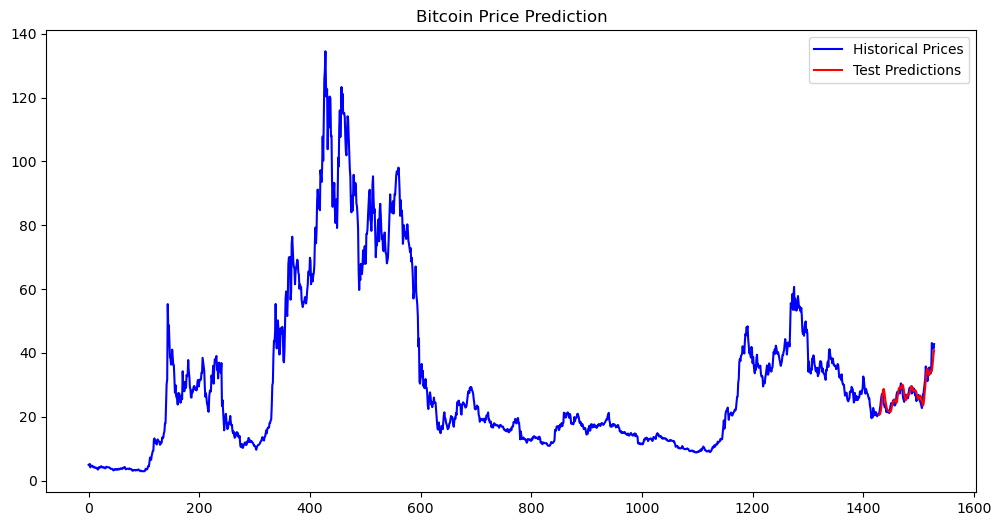

In [15]:
# Adjust predictions to match the last 100 test samples
test_predictions = predictions[-100:]  # Take the last 100 predictions

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label="Historical Prices", color="blue")
plt.plot(range(len(data) - 100, len(data)), test_predictions, label="Test Predictions", color="red")
plt.title("Bitcoin Price Prediction")
plt.legend()
plt.show()

In [16]:
# 11. Results: Display future prices in a table and save to CSV
future_prices_df = pd.DataFrame(
    list(future_prices.items()), columns=["Date", "PredictedPrice"]
)

# Save the table to a CSV file
future_prices_df.to_csv("AVAX_future_predicted_prices.csv", index=False)

# Display the table in the notebook
future_prices_df


,Date,PredictedPrice
0,2024-11-29,41.531597
1,2024-11-30,41.576607
2,2024-12-01,41.229950
3,2024-12-02,40.718109
4,2024-12-03,40.161785
